## NREL National Solar Radiation Database (NSRDB) - HSDS Demo

This notebook demonstrates basic usage of the National Renewable Energy Laboratory (NREL) National Solar Radiation Database (NSRDB) data. The data is provided from Amazon Web Services using the HDF Group's Highly Scalable Data Service (HSDS).

Please consult the README file for setup instructions prior to running this notebook.


In [92]:
%matplotlib inline
import h5pyd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.spatial import cKDTree

## Basic Usage

The NSRDB is provided in annual .h5 files and currently spans 1998-2018.  
Each year can be accessed from /nrel/nsrdb/nsrdb_${year}.h5

In [99]:
# Open the desired year of nsrdb data
# server endpoint, username, password is found via a config file
f = h5pyd.File("/nrel/nsrdb/conus/nsrdb_conus_2022.h5")

In [100]:
list(f.attrs)  # list attributes belonging to the root group

['version']

In [101]:
f.attrs['version']   # attributes can be used to provide desriptions of the content

'4.0.0'

## Datasets

In [102]:
# list the datasets in the file
for k in f:
    dset = f[k]
    print(f"{dset.name} {dset.shape}")

/air_temperature (105120, 2842719)
/alpha (105120, 2842719)
/aod (105120, 2842719)
/asymmetry (105120, 2842719)
/cld_opd_dcomp (105120, 2842719)
/cld_press_acha (105120, 2842719)
/cld_reff_dcomp (105120, 2842719)
/clearsky_dhi (105120, 2842719)
/clearsky_dni (105120, 2842719)
/clearsky_ghi (105120, 2842719)
/cloud_fill_flag (105120, 2842719)
/cloud_type (105120, 2842719)
/dew_point (105120, 2842719)
/dhi (105120, 2842719)
/dni (105120, 2842719)
/fill_flag (105120, 2842719)
/ghi (105120, 2842719)
/meta (2842719,)
/ozone (105120, 2842719)
/relative_humidity (105120, 2842719)
/solar_zenith_angle (105120, 2842719)
/ssa (105120, 2842719)
/surface_albedo (105120, 2842719)
/surface_pressure (105120, 2842719)
/time_index (105120,)
/total_precipitable_water (105120, 2842719)
/wind_direction (105120, 2842719)
/wind_speed (105120, 2842719)


In [103]:
arizona_lat_lon_df = pd.read_csv("arizona_lat_lon.csv")

In [111]:
import pandas as pd
from sklearn.neighbors import KDTree

# Load datasets
df1 = pd.read_csv("arizona_lat_lon.csv")  # Source dataset
df2 = pd.read_csv("meta_lat_lon.csv")     # Target dataset

# Build KDTree on meta_lat_lon dataset
tree = KDTree(df2[["latitude", "longitude"]].values)

# Query the nearest neighbor (k=1)
distances, indices = tree.query(df1[["latitude", "longitude"]].values, k=1)

# Create a DataFrame with the results
one_to_one_matches = pd.DataFrame({
    "arizona_index": range(len(df1)),
    "meta_index": indices.flatten(),
    "distance": distances.flatten()
})

# Optional: save to CSV
one_to_one_matches.to_csv("one_to_one_lat_lon_matches.csv", index=False)

# Print sample matches
print(one_to_one_matches.head())


   arizona_index  meta_index  distance
0              0      578289  0.014142
1              1      581982  0.014142
2              2      583229  0.014142
3              3      586984  0.014142
4              4      588237  0.014142


In [112]:
one_to_one_matches.shape

(18081, 3)

In [105]:
meta = pd.DataFrame(f['meta'][...])
meta.head()

,latitude,longitude,elevation,timezone,country,state,county,gid_full
0,22.100000,-160.429993,0,-10.0,b'nan',b'nan',b'nan',75456
1,22.080000,-160.429993,0,-10.0,b'nan',b'nan',b'nan',75457
2,22.059999,-160.429993,0,-10.0,b'nan',b'nan',b'nan',75458
3,22.040001,-160.429993,0,-10.0,b'nan',b'nan',b'nan',75459
4,22.020000,-160.429993,0,-10.0,b'nan',b'nan',b'nan',75460


In [107]:
meta[['latitude', 'longitude']].to_csv("meta_lat_lon.csv", index=False)

In [106]:
meta.shape

(2842719, 8)

In [98]:
arizona_data = meta.loc[meta['state'] == b'Arizona']
arizona_data

,latitude,longitude,elevation,timezone,country,state,county,urban,population,landcover
61340,31.330000,-111.059998,1482.849976,-7,b'United States',b'Arizona',b'Santa Cruz',b'None',28,110
61341,31.330000,-111.019997,1323.449951,-7,b'United States',b'Arizona',b'Santa Cruz',b'None',137,130
61342,31.330000,-110.980003,1266.800049,-7,b'United States',b'Arizona',b'Santa Cruz',b'None',16510,130
61343,31.330000,-110.940002,1205.050049,-7,b'United States',b'Arizona',b'Santa Cruz',b'Nogales',35764,130
61344,31.330000,-110.900002,1220.187500,-7,b'United States',b'Arizona',b'Santa Cruz',b'None',446,130
...,...,...,...,...,...,...,...,...,...,...
113899,36.970001,-109.220001,1583.439941,-7,b'United States',b'Arizona',b'Apache',b'None',4,130
113900,36.970001,-109.180000,1594.599976,-7,b'United States',b'Arizona',b'Apache',b'None',5,130
113901,36.970001,-109.139999,1538.239990,-7,b'United States',b'Arizona',b'Apache',b'None',3,130
113902,36.970001,-109.099998,1485.849976,-7,b'United States',b'Arizona',b'Apache',b'None',4,130


In [91]:
# Extract latitude and longitude columns
arizona_lat_lon = arizona_data[['latitude', 'longitude']]

# Save to a CSV file
arizona_lat_lon.to_csv("arizona_lat_lon.csv", index=False)

In [ ]:
arizona_indices = arizona_data.index.values
arizona_indices

array([ 61340,  61341,  61342, ..., 113901, 113902, 113903])

In [ ]:
ghi_dset = f['ghi']
ghi_test = ghi_dset[:, 61340]
ghi_test.shape

(17568,)

In [64]:
dni_dset = f['dni']
dni_test = dni_dset[:, 61340]
dni_test.shape

(17568,)

In [67]:
dhi_dset = f['dhi']
dhi_test = dhi_dset[:, 61340]
dhi_test.shape

(17568,)

In [76]:
wind_dset = f['wind_speed']
wind_test = wind_dset[:, 61340]
wind_test.shape

(17568,)

In [85]:
sp_dset = f['surface_pressure']
sp_test = sp_dset[:, 61340]
sp_test.shape

(17568,)

In [86]:
res = []
for index in arizona_indices:
    sp_test = sp_dset[:, index]
    res.append(sp_test.mean(axis=0))



In [87]:
print("Number of numbers in res:", len(res))

Number of numbers in res: 18082


In [88]:
arizona_data['sp_mean'] = res
arizona_data.head()

/tmp/ipykernel_36836/3060452776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arizona_data['sp_mean'] = res


,latitude,longitude,elevation,timezone,country,state,county,urban,population,landcover,ghi_mean,dni_mean,dhi_mean,temp_mean,wind_mean,sp_mean
61340,31.33,-111.059998,1482.849976,-7,b'United States',b'Arizona',b'Santa Cruz',b'None',28,110,250.239242,336.745105,50.936703,169.139117,25.954463,844.668659
61341,31.33,-111.019997,1323.449951,-7,b'United States',b'Arizona',b'Santa Cruz',b'None',137,130,249.333163,333.817111,51.304076,184.482582,25.788650,869.616576
61342,31.33,-110.980003,1266.800049,-7,b'United States',b'Arizona',b'Santa Cruz',b'None',16510,130,249.846141,334.314265,51.267760,186.072974,25.711009,872.355191
61343,31.33,-110.940002,1205.050049,-7,b'United States',b'Arizona',b'Santa Cruz',b'Nogales',35764,130,248.731045,331.032901,52.062955,188.972962,25.473076,877.573201
61344,31.33,-110.900002,1220.187500,-7,b'United States',b'Arizona',b'Santa Cruz',b'None',446,130,248.572291,331.077300,51.834984,190.762807,25.395321,880.681182


In [89]:
# Save arizona_data to a CSV file (arizona_data.csv) without the index column
arizona_data.to_csv("arizona_data2020.csv", index=False)

AttributeError: 'list' object has no attribute 'shape'

In [41]:
# Access the 'ghi' dataset from the file (assuming it hasn't been loaded yet)
ghi_dset = f['ghi']

# Get the indices for Arizona coordinates from the arizona_data DataFrame
arizona_indices = arizona_data.index.values

# Slice the dataset to get only the Arizona coordinates (all 17568 time steps)
ghi_subset = ghi_dset[:, arizona_indices]

# Compute the average over time (i.e. across all 17568 rows)
mean_ghi = ghi_subset.mean(axis=0)

# Unscale the data using the 'psm_scale_factor' attribute
mean_ghi_unscaled = mean_ghi / ghi_dset.attrs['psm_scale_factor']

print(mean_ghi_unscaled)

ERROR:root:POST error: 413
ERROR:root:POST error - status_code: 413, reason: Request Entity Too Large


OSError: Error retrieving data: None

In [33]:
The `dset` variable is an HDF5 dataset with the shape `(17568, 2018392)`. Here's what the dimensions represent:

1. **17568**: This corresponds to the number of time steps in the dataset. Since the dataset has a temporal resolution of 30 minutes (as inferred from the `time_index`), this represents the total number of 30-minute intervals in a year (365 days × 48 intervals per day = 17568).

2. **2018392**: This corresponds to the number of spatial locations in the dataset. Each location is defined by its latitude and longitude coordinates, as stored in the `coords` variable.

Thus, the dataset contains irradiance values (or other data) for 2018392 locations over 17568 time steps. Each entry in the dataset represents the value for a specific location at a specific time.

SyntaxError: unterminated string literal (detected at line 1) (262319085.py, line 1)

In [ ]:
Give me the data from dset, with temporal resolution of 60 minutes and only for the coordinates in arizona_dataYou

In [ ]:
# Filter the dataset for Arizona coordinates
arizona_indices = arizona_data.index

In [ ]:
#meta = pd.DataFrame(f['meta'][...])

datedate = pd.DataFrame(f['time_index'])

datedate

,0
0,b'2020-01-01 00:00:00+00:00'
1,b'2020-01-01 00:30:00+00:00'
2,b'2020-01-01 01:00:00+00:00'
3,b'2020-01-01 01:30:00+00:00'
4,b'2020-01-01 02:00:00+00:00'
...,...
17563,b'2020-12-31 21:30:00+00:00'
17564,b'2020-12-31 22:00:00+00:00'
17565,b'2020-12-31 22:30:00+00:00'
17566,b'2020-12-31 23:00:00+00:00'


In [ ]:
time_index_hourly = datedate[::2]
time_index_hourly
# time_index_hourly.shape

,0
0,b'2020-01-01 00:00:00+00:00'
2,b'2020-01-01 01:00:00+00:00'
4,b'2020-01-01 02:00:00+00:00'
6,b'2020-01-01 03:00:00+00:00'
8,b'2020-01-01 04:00:00+00:00'
...,...
17558,b'2020-12-31 19:00:00+00:00'
17560,b'2020-12-31 20:00:00+00:00'
17562,b'2020-12-31 21:00:00+00:00'
17564,b'2020-12-31 22:00:00+00:00'


In [ ]:
# Extract datetime index for datasets
time_index = pd.to_datetime(f['time_index'][...].astype(str))
time_index # Temporal resolution is 30min

DatetimeIndex(['2020-01-01 00:00:00+00:00', '2020-01-01 00:30:00+00:00',
               '2020-01-01 01:00:00+00:00', '2020-01-01 01:30:00+00:00',
               '2020-01-01 02:00:00+00:00', '2020-01-01 02:30:00+00:00',
               '2020-01-01 03:00:00+00:00', '2020-01-01 03:30:00+00:00',
               '2020-01-01 04:00:00+00:00', '2020-01-01 04:30:00+00:00',
               ...
               '2020-12-31 19:00:00+00:00', '2020-12-31 19:30:00+00:00',
               '2020-12-31 20:00:00+00:00', '2020-12-31 20:30:00+00:00',
               '2020-12-31 21:00:00+00:00', '2020-12-31 21:30:00+00:00',
               '2020-12-31 22:00:00+00:00', '2020-12-31 22:30:00+00:00',
               '2020-12-31 23:00:00+00:00', '2020-12-31 23:30:00+00:00'],
              dtype='datetime64[ns, UTC]', length=17568, freq=None)

In [ ]:
time_index_hourly = time_index[::2]
time_index_hourly
time_index_hourly.shape


(8784,)

In [ ]:
time_index.shape

(17568,)

In [ ]:
# Locational information is stored in either 'meta' or 'coordinates'
meta = pd.DataFrame(f['meta'][...])
meta.head()

,latitude,longitude,elevation,timezone,country,state,county,urban,population,landcover
0,-19.99,-175.259995,0.0,13,b'None',b'None',b'None',b'None',-9999,210
1,-19.99,-175.220001,0.0,13,b'None',b'None',b'None',b'None',-9999,210
2,-19.99,-175.179993,0.0,13,b'None',b'None',b'None',b'None',-9999,210
3,-19.99,-175.139999,0.0,13,b'None',b'None',b'None',b'None',-9999,210
4,-19.99,-175.100006,0.0,13,b'None',b'None',b'None',b'None',-9999,210


In [ ]:
arizona_data = meta.loc[meta['state'] == b'Arizona']
arizona_data

,latitude,longitude,elevation,timezone,country,state,county,urban,population,landcover
61340,31.330000,-111.059998,1482.849976,-7,b'United States',b'Arizona',b'Santa Cruz',b'None',28,110
61341,31.330000,-111.019997,1323.449951,-7,b'United States',b'Arizona',b'Santa Cruz',b'None',137,130
61342,31.330000,-110.980003,1266.800049,-7,b'United States',b'Arizona',b'Santa Cruz',b'None',16510,130
61343,31.330000,-110.940002,1205.050049,-7,b'United States',b'Arizona',b'Santa Cruz',b'Nogales',35764,130
61344,31.330000,-110.900002,1220.187500,-7,b'United States',b'Arizona',b'Santa Cruz',b'None',446,130
...,...,...,...,...,...,...,...,...,...,...
113899,36.970001,-109.220001,1583.439941,-7,b'United States',b'Arizona',b'Apache',b'None',4,130
113900,36.970001,-109.180000,1594.599976,-7,b'United States',b'Arizona',b'Apache',b'None',5,130
113901,36.970001,-109.139999,1538.239990,-7,b'United States',b'Arizona',b'Apache',b'None',3,130
113902,36.970001,-109.099998,1485.849976,-7,b'United States',b'Arizona',b'Apache',b'None',4,130


In [ ]:
latitude = meta['latitude'][::2]
longitude = meta['longitude'][::2]
elevation = meta['elevation'][::2]
country = meta['country'][::2]
state = meta['state'][::2]
county = meta['county'][::2]

latitude.shape

# latitude, longitude, elevation, country, state, county

(1009196,)

In [ ]:
meta.shape

(2018392, 10)

In [ ]:
# ghi dataset have been saved as integers
dset.dtype

dtype('uint16')

In [ ]:
dset.shape[0] * dset.shape[1] * 2 * 10**-9 # 70 GB per dataset!

70.918221312

In [ ]:
dset.chunks # Chunked by week

(2688, 372)

In [ ]:
dset.chunks[0] * dset.chunks[1] * 2 * 10**-6 # 2 MB per chunk

1.9998719999999999

In [ ]:
# To convert dataset values back to floats use the 'psm_scale_factor'
dset.attrs['psm_scale_factor'] # Irradiance values have been truncated to integer precision

1.0

In [ ]:
# wind speed on the other hand has single decimal percision when scaled by 10
scale_factor = f['wind_speed'].attrs['psm_scale_factor']
#. units = f['wind_speed'].attrs['psm_units']. # tbd - this attribute doesn't exist
print('wind_speed scale factor = ', scale_factor)
# print('wind_speed units after unscaling = ', units)
f['wind_speed'][0, 0] / scale_factor # divide by scale_factor to return native value

wind_speed scale factor =  10.0


9.7

## Time-slicing

Get the time_index from the server and convert to a pandas DatetimeIndex for convenience:

In [ ]:
time_index = pd.to_datetime(f['time_index'][...].astype(str))
time_index

DatetimeIndex(['2020-01-01 00:00:00+00:00', '2020-01-01 00:30:00+00:00',
               '2020-01-01 01:00:00+00:00', '2020-01-01 01:30:00+00:00',
               '2020-01-01 02:00:00+00:00', '2020-01-01 02:30:00+00:00',
               '2020-01-01 03:00:00+00:00', '2020-01-01 03:30:00+00:00',
               '2020-01-01 04:00:00+00:00', '2020-01-01 04:30:00+00:00',
               ...
               '2020-12-31 19:00:00+00:00', '2020-12-31 19:30:00+00:00',
               '2020-12-31 20:00:00+00:00', '2020-12-31 20:30:00+00:00',
               '2020-12-31 21:00:00+00:00', '2020-12-31 21:30:00+00:00',
               '2020-12-31 22:00:00+00:00', '2020-12-31 22:30:00+00:00',
               '2020-12-31 23:00:00+00:00', '2020-12-31 23:30:00+00:00'],
              dtype='datetime64[ns, UTC]', length=17568, freq=None)

Extract indexes for a particular span of time:

In [ ]:
march = time_index.month == 3
np.where(march)[0]

array([2880, 2881, 2882, ..., 4365, 4366, 4367])

Or a particular date:

In [ ]:
timestep = np.where(time_index == '2020-07-04 00:00:00')[0][0]
timestep

8880

## Map Data

In [ ]:
# Extract coordinates (lat, lon)
print(dict(f['coordinates'].attrs))
coords = f['coordinates'][...]

{'description': '(latitude, longitude)'}


In [ ]:
f['ghi'][0]

array([789, 675, 398, ...,   0,   0,   0], dtype=uint16)

In [ ]:
dset = f['ghi']
%time data = dset[timestep, ::10]   # extract every 10th location at a particular time
df = pd.DataFrame() # Combine data with coordinates in a DataFrame
df['longitude'] = coords[::10, 1]
df['latitude'] = coords[::10, 0]
df['ghi'] = data / dset.attrs['psm_scale_factor'] # unscale dataset

CPU times: user 5.74 ms, sys: 751 μs, total: 6.49 ms
Wall time: 1min 59s


In [ ]:
# Extract DHI and DNI datasets
dhi_data = f['dhi'][timestep, ::10]  # Extract every 10th location at the given timestep
dni_data = f['dni'][timestep, ::10]  # Extract every 10th location at the given timestep

# Scale the datasets using their respective scale factors
dhi_scaled = dhi_data / f['dhi'].attrs['psm_scale_factor']
dni_scaled = dni_data / f['dni'].attrs['psm_scale_factor']

# Add DHI and DNI as new columns to the dataframe
df['dhi'] = dhi_scaled
df['dni'] = dni_scaled

In [ ]:
df.head

<bound method NDFrame.head of          longitude   latitude    ghi    dhi    dni
0      -175.259995 -19.990000  430.0  326.0  142.0
1      -174.860001 -19.990000  667.0  154.0  701.0
2      -174.179993 -19.990000  455.0  276.0  245.0
3      -158.139999 -19.990000  454.0  189.0  391.0
4      -157.740005 -19.990000  325.0  275.0   74.0
...            ...        ...    ...    ...    ...
201835  179.740005  51.930000    0.0    0.0    0.0
201836  179.779999  52.009998    0.0    0.0    0.0
201837  179.779999  52.169998    0.0    0.0    0.0
201838  179.820007  51.689999    0.0    0.0    0.0
201839  179.860001  51.770000    0.0    0.0    0.0

[201840 rows x 5 columns]>

In [ ]:
df.shape

(201840, 3)

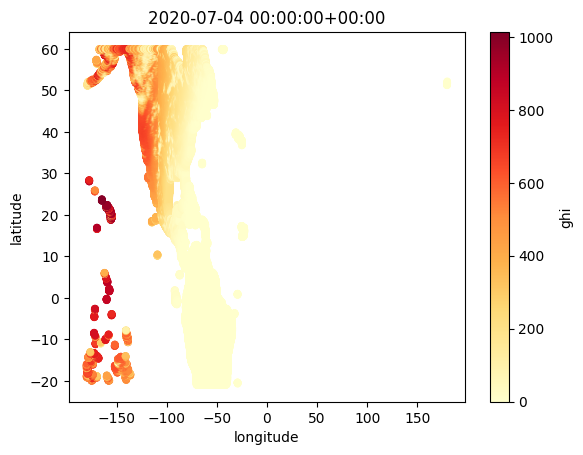

In [ ]:
df.plot.scatter(x='longitude', y='latitude', c='ghi',
                colormap='YlOrRd',
                title=str(time_index[timestep]))
plt.show()

In [ ]:
# Full resolution subset of Colorado
meta = pd.DataFrame(f['meta'][...])
AZ = meta.loc[meta['state'] == b'Arizona'] # Note .h5 saves strings as bit-strings
AZ.head()

,latitude,longitude,elevation,timezone,country,state,county,urban,population,landcover
61340,31.33,-111.059998,1482.849976,-7,b'United States',b'Arizona',b'Santa Cruz',b'None',28,110
61341,31.33,-111.019997,1323.449951,-7,b'United States',b'Arizona',b'Santa Cruz',b'None',137,130
61342,31.33,-110.980003,1266.800049,-7,b'United States',b'Arizona',b'Santa Cruz',b'None',16510,130
61343,31.33,-110.940002,1205.050049,-7,b'United States',b'Arizona',b'Santa Cruz',b'Nogales',35764,130
61344,31.33,-110.900002,1220.187500,-7,b'United States',b'Arizona',b'Santa Cruz',b'None',446,130


In [ ]:
%time data = dset[timestep][AZ.index]  # full-resolution subset
df = AZ[['longitude', 'latitude']].copy()
df['ghi'] = data / dset.attrs['psm_scale_factor']
df.shape

CPU times: user 14.1 ms, sys: 3.77 ms, total: 17.9 ms
Wall time: 2min


(18082, 3)

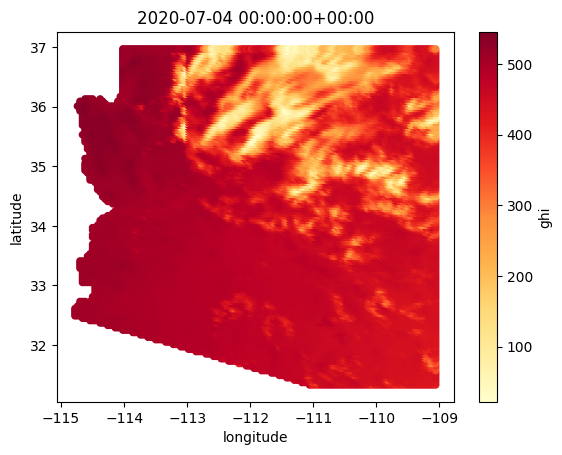

In [ ]:
df.plot.scatter(x='longitude', y='latitude', c='ghi',
                colormap='YlOrRd',
                title=str(time_index[timestep]))
plt.show()

## Nearest Timeseries for given Lat/Lon

In [ ]:
# Unlike the gridded WTK data the NSRDB is provided as sparse time-series dataset.
# The quickest way to find the nearest site it using a KDtree

dset_coords = f['coordinates'][...]
tree = cKDTree(dset_coords)
def nearest_site(tree, lat_coord, lon_coord):
    lat_lon = np.array([lat_coord, lon_coord])
    dist, pos = tree.query(lat_lon)
    return pos

PhoenixCity = (33.4482, -112.0777)
PhoenixCity_idx = nearest_site(tree, PhoenixCity[0], PhoenixCity[1] )

print("Site index for Phoenix City: \t\t {}".format(PhoenixCity_idx))
print("Coordinates of Phoenix City: \t {}".format(PhoenixCity))
print("Coordinates of nearest point: \t {}".format(dset_coords[PhoenixCity_idx]))

Site index for Phoenix City: 		 78206
Coordinates of Phoenix City: 	 (33.4482, -112.0777)
Coordinates of nearest point: 	 [  33.45 -112.06]


In [ ]:
# Get the entire 2012 timeseries data for a point in NYC
%time tseries = dset[:, PhoenixCity_idx] / dset.attrs['psm_scale_factor']

CPU times: user 3.54 ms, sys: 163 μs, total: 3.71 ms
Wall time: 1.83 s


In [ ]:
len(tseries)   # 1 years * 365 days * 24 hours * 30 minutes

17568

Text(0.5, 1.0, 'PHX ghi in 2020')

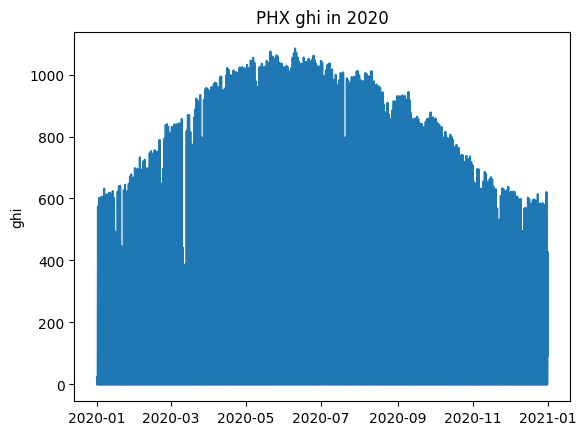

In [ ]:
plt.plot(time_index, tseries)
plt.ylabel("ghi")
plt.title("PHX ghi in 2020")

## GHI Statistics

In [ ]:
df = pd.DataFrame({'ghi': tseries}, index=time_index)
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.day
df["hour"] = df.index.hour

agg = df.groupby(["month","hour"]).mean()
agg = agg.reset_index().pivot(index="month",columns="hour",values="ghi")
agg


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
1,54.693548,0.225806,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.290323,92.225806,248.161290,385.532258,500.161290,553.241935,545.451613,475.532258,353.629032,213.016129
2,128.051724,9.534483,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.603448,147.431034,323.241379,469.155172,583.793103,657.034483,672.362069,610.793103,495.620690,320.793103
3,183.112903,40.112903,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.064516,239.822581,433.838710,592.822581,715.500000,749.096774,732.048387,665.483871,534.177419,363.645161
4,310.483333,103.033333,2.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,203.266667,422.883333,624.950000,797.300000,895.450000,942.683333,913.650000,833.116667,703.650000,519.150000
5,375.483871,162.822581,18.483871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,295.741935,504.548387,693.516129,846.516129,955.500000,1010.629032,989.887097,909.096774,776.661290,593.645161
6,413.016667,205.566667,41.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,316.416667,529.716667,717.100000,875.983333,979.033333,1017.250000,1002.550000,918.416667,795.050000,619.400000
7,402.516129,200.758065,39.596774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.145161,450.645161,644.064516,788.322581,900.677419,965.225806,935.822581,874.274194,748.000000,585.451613
8,320.596774,126.000000,10.967742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,193.709677,390.145161,589.693548,758.677419,863.903226,919.483871,913.951613,837.564516,710.903226,528.419355
9,212.583333,40.650000,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,149.283333,350.400000,538.050000,700.583333,819.400000,864.850000,835.883333,745.716667,606.266667,414.933333


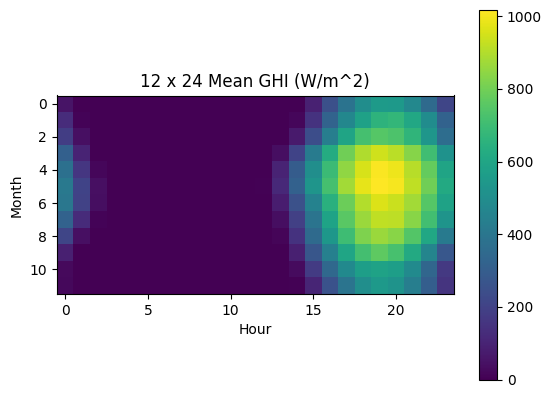

In [ ]:
plt.imshow(agg)
plt.xlabel("Hour")
plt.ylabel("Month")
plt.title("12 x 24 Mean GHI (W/m^2)")
plt.colorbar()